# Table of Contents

* [Imports](#Imports)
* [Data Read In](#Data-Read-In)
* Model Fitting
    * [Parameter Combination](#Parameter-Combination)
    * [Split On Sex](#Split-On-Sex)
    * [Split On Sex Parameter Combination](#Split-On-Sex-Parameter-Combination)
* Model Evaluation
    * [Cross Validation](#Cross-Validation)
* Bootstrapping
    * [Setup](#Setup)
    * [Running](#Running)
    * [Results](#Results)

# Imports
[Back to Top](#Table-of-Contents)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from itertools import combinations
from random import choices
import seaborn as sns
import matplotlib.pyplot as plt

# Data Read In
[Back to Top](#Table-of-Contents)

In [2]:
root = "../data/"

#knnDat = pd.read_csv(root + "violenceKNN_splitForImpute.csv")
#features = pd.read_csv(root + "Economic_Data.csv", index_col=0)
#features.columns = ["year", "sitename"] + list(features.columns)[2:]
#knnSplResp = pd.read_csv(root + "vioRespKNNSexSplit.csv")
#knnSplResp = pd.read_csv(root + "violenceKNNResp_wSex_NotSplitImp.csv")
#knnSplResp["sex"] = knnSplResp["sex"].replace({1 : "Female", 2 : "Male"})
#knnSplResp["sex"] = knnSplResp["sex"].replace({"Male" : 1,
#                                               "Female" : 0})
#meanSplResp = pd.read_csv(root + "vioRespMeanSexSplit.csv")
#MedSplResp = pd.read_csv(root + "vioRespMedSexSplit.csv")
#ModeSplResp = pd.read_csv(root + "vioRespModeSexSplit.csv")
#violenceqs = ["q12", "q13", "q15",
#              "q16", "q17", "q18"]
#bootDat = pd.read_csv(root + "knnImputeVio_WSex.csv")[violenceqs + ["year", "sitename", "sex"]]
#bootDat["sex"] = bootDat["sex"].replace({1 : "Female", 2 : "Male"})
#bootDat["sex"] = bootDat["sex"].replace({"Male" : 1,
#                                         "Female" : 0})
bootParams = pd.read_csv(root + "params.csv")
bootPredVars = pd.read_csv(root + "predictVars.csv")
bootSampleVars = pd.read_csv(root + "sampleVars.csv")

# Model Fitting

## Parameter Combination
[Back to Top](#Table-of-Contents)

In [144]:
dropCols = ["Year", 
            "State / County Name",
            "Ages 5 to 17 in Families SAIPE Poverty Universe",
            "Ages 5 to 17 in Families in Poverty Count",
            "Ages 5 to 17 in Families in Poverty Percent",
            "All Ages in Poverty Count",
            "All Ages SAIPE Poverty Universe",
            "Under Age 18 SAIPE Poverty Universe",
            "Under Age 18 in Poverty Count"]
knnDat = knnDat.merge(features, how="inner", left_on=["year", "sitename"],
                      right_on=["Year", "State / County Name"]).drop(dropCols, axis=1)
knnDat.columns = ['year', 'sitename', 'violenceScore',
       'AllAgesInPovertyPercent', 'UnderAge18inPovertyPercent',
       'MedianHouseholdIncomeInDollars', 'UnemploymentRate', 'Population',
       'SNAP']

In [21]:
allFeatures = np.asarray(knnDat.drop(["sitename", "violenceScore"], axis=1).columns)

In [22]:
modelsAIC = pd.DataFrame(columns=["AIC", "features"])
for nComb in reversed(range(1, 7)):
    combs = combinations(allFeatures, nComb)
    for comb in combs:
        equ = "violenceScore ~ "
        i = 0
        for feat in comb:
            equ += feat 
            if len(comb) - 1 != i:
                equ += "+"
            i += 1
        md = smf.mixedlm(equ, knnDat, 
                         groups=knnDat["sitename"])
        mdf = md.fit(reml=False)
        modelsAIC = modelsAIC.append({'AIC' : mdf.aic, "features" : comb}, ignore_index=True)

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/stats

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 7.803333
  warnings.warn(msg, ConvergenceWarning)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/env

In [23]:
modelsAIC.sort_values("AIC")

,AIC,features
101,772.352482,"(year, UnemploymentRate)"
69,773.931227,"(year, UnderAge18inPovertyPercent, Unemploymen..."
76,774.176704,"(year, UnemploymentRate, SNAP)"
75,774.197420,"(year, UnemploymentRate, Population)"
72,774.232398,"(year, MedianHouseholdIncomeInDollars, Unemplo..."
...,...,...
121,870.691511,"(UnderAge18inPovertyPercent,)"
111,872.638754,"(UnderAge18inPovertyPercent, Population)"
120,874.095724,"(AllAgesInPovertyPercent,)"
107,876.185382,"(AllAgesInPovertyPercent, Population)"


In [24]:
allFeatures = np.asarray(knnDat.drop(["sitename", "violenceScore", "year"], axis=1).columns)

modelsAIC = pd.DataFrame(columns=["AIC", "features"])
for nComb in reversed(range(1, 7)):
    combs = combinations(allFeatures, nComb)
    for comb in combs:
        equ = "violenceScore ~ "
        i = 0
        for feat in comb:
            equ += feat 
            if len(comb) - 1 != i:
                equ += "+"
            i += 1
        md = smf.mixedlm(equ, knnDat, 
                         groups=knnDat["sitename"])
        mdf = md.fit(reml=False)
        modelsAIC = modelsAIC.append({'AIC' : mdf.aic, "features" : comb}, ignore_index=True)

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/stats

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 7.803333
  warnings.warn(msg, ConvergenceWarning)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/env

In [25]:
modelsAIC.sort_values("AIC")

,AIC,features
55,784.257982,"(UnemploymentRate, SNAP)"
39,785.452798,"(MedianHouseholdIncomeInDollars, UnemploymentR..."
41,785.666856,"(UnemploymentRate, Population, SNAP)"
36,786.048424,"(UnderAge18inPovertyPercent, UnemploymentRate,..."
11,786.171478,"(AllAgesInPovertyPercent, UnderAge18inPovertyP..."
...,...,...
58,870.691511,"(UnderAge18inPovertyPercent,)"
49,872.638754,"(UnderAge18inPovertyPercent, Population)"
57,874.095724,"(AllAgesInPovertyPercent,)"
45,876.185382,"(AllAgesInPovertyPercent, Population)"


In [26]:
md = smf.mixedlm("violenceScore ~ 1", knnDat, groups=knnDat["sitename"])
mdf = md.fit(reml=False)
print(mdf.summary())#-431.9609 

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: violenceScore
No. Observations: 122     Method:             ML           
No. Groups:       14      Scale:              69.5832      
Min. group size:  8       Log-Likelihood:     -435.5395    
Max. group size:  9       Converged:          No           
Mean group size:  8.7                                      
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept    38.443     0.980  39.245  0.000  36.523  40.363
Group Var     5.439     0.535                               



/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 5.356236
  warnings.warn(msg, ConvergenceWarning)


In [27]:
mdf.aic

877.0790323019997

## Split On Sex
[Back to Top](#Table-of-Contents)

In [103]:
dropCols = ["Year", 
            "State / County Name",
            "Ages 5 to 17 in Families SAIPE Poverty Universe",
            "Ages 5 to 17 in Families in Poverty Count",
            "Ages 5 to 17 in Families in Poverty Percent",
            "All Ages in Poverty Count",
            "All Ages SAIPE Poverty Universe",
            "Under Age 18 SAIPE Poverty Universe",
            "Under Age 18 in Poverty Count"]
dat = knnSplResp.merge(features, how="inner", left_on=["year", "sitename"],
                       right_on=["Year", "State / County Name"]).drop(dropCols, axis=1)

In [104]:
dat.columns = ['year', 'sitename', 'sex', 'violenceScore',
       'AllAgesInPovertyPercent', 'UnderAge18inPovertyPercent',
       'MedianHouseholdIncomeInDollars', 'UnemploymentRate', 'Population',
       'SNAP']

In [7]:
# run with new data
md = smf.ols("violenceScore ~ sex*UnemploymentRate + sex*SNAP", dat)
mdf = md.fit()
print(mdf.aic)
print(mdf.summary())

1638.6848034575946
                            OLS Regression Results                            
Dep. Variable:          violenceScore   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           1.28e-87
Time:                        15:08:35   Log-Likelihood:                -813.34
No. Observations:                 244   AIC:                             1639.
Df Residuals:                     238   BIC:                             1660.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept    

In [84]:
md = smf.ols("violenceScore ~ sex*UnemploymentRate + sex*SNAP", dat)
mdf = md.fit()
print(mdf.aic)
print(mdf.summary())

1640.0872233672335
                            OLS Regression Results                            
Dep. Variable:          violenceScore   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     226.2
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           2.86e-88
Time:                        14:53:55   Log-Likelihood:                -814.04
No. Observations:                 244   AIC:                             1640.
Df Residuals:                     238   BIC:                             1661.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [8]:
# run with new data
md = smf.mixedlm("violenceScore ~ sex + UnemploymentRate + SNAP", dat, groups=dat["sitename"])
mdf = md.fit(reml=False)
print(mdf.aic)
print(mdf.summary())

1655.3197274360884
           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: violenceScore
No. Observations:  244     Method:             ML           
No. Groups:        14      Scale:              45.6675      
Min. group size:   16      Log-Likelihood:     -821.6599    
Max. group size:   18      Converged:          Yes          
Mean group size:   17.4                                     
------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept        47.636    2.669  17.845 0.000 42.404 52.868
sex              25.788    0.865  29.804 0.000 24.092 27.484
UnemploymentRate  1.568    0.178   8.785 0.000  1.218  1.918
SNAP             -0.247    0.020 -12.412 0.000 -0.286 -0.208
Group Var         7.181    0.573                            



In [79]:
md = smf.mixedlm("violenceScore ~ sex + UnemploymentRate + SNAP", dat, groups=dat["sitename"])
mdf = md.fit(reml=False)
print(mdf.aic)
print(mdf.summary())

1657.5762363435827
           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: violenceScore
No. Observations:  244     Method:             ML           
No. Groups:        14      Scale:              46.1138      
Min. group size:   16      Log-Likelihood:     -822.7881    
Max. group size:   18      Converged:          Yes          
Mean group size:   17.4                                     
------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept        47.548    2.681  17.734 0.000 42.293 52.803
sex[T.Male]      26.111    0.869  30.032 0.000 24.407 27.816
UnemploymentRate  1.571    0.179   8.760 0.000  1.220  1.923
SNAP             -0.247    0.020 -12.379 0.000 -0.287 -0.208
Group Var         7.169    0.572                            



In [80]:
md = smf.mixedlm("violenceScore ~ sex*UnemploymentRate + sex*SNAP", dat, groups=dat["sitename"])
mdf = md.fit(reml=False)
print(mdf.aic)
print(mdf.summary())

1622.658252423583
                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     violenceScore
No. Observations:     244         Method:                 ML           
No. Groups:           14          Scale:                  38.9244      
Min. group size:      16          Log-Likelihood:         -803.3291    
Max. group size:      18          Converged:              Yes          
Mean group size:      17.4                                             
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                    35.895    3.358 10.689 0.000 29.313 42.476
sex[T.Male]                  49.469    4.579 10.804 0.000 40.495 58.442
UnemploymentRate              1.126    0.226  4.989 0.000  0.684  1.568
sex[T.Male]:UnemploymentRate  0.870    0.307  2.830 0.005  0.26

In [81]:
md = smf.mixedlm("violenceScore ~ sex + UnemploymentRate + SNAP", dat, groups=dat["sitename"], re_formula="~sex")
mdf = md.fit(reml=False)
print(mdf.aic)
print(mdf.summary())

1660.6332095921155
               Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   violenceScore
No. Observations:     244       Method:               ML           
No. Groups:           14        Scale:                45.8600      
Min. group size:      16        Log-Likelihood:       -822.3166    
Max. group size:      18        Converged:            Yes          
Mean group size:      17.4                                         
-------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept               47.471    2.644  17.952 0.000 42.288 52.654
sex[T.Male]             26.109    0.906  28.820 0.000 24.334 27.885
UnemploymentRate         1.580    0.179   8.808 0.000  1.228  1.931
SNAP                    -0.247    0.020 -12.410 0.000 -0.286 -0.208
Group Var                4.807    0.622     

In [82]:
md = smf.mixedlm("violenceScore ~ sex*UnemploymentRate + sex*SNAP", dat, groups=dat["sitename"], re_formula="~sex")
mdf = md.fit(reml=False)
print(mdf.aic)
print(mdf.summary())

1625.7340980885758
                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     violenceScore
No. Observations:     244         Method:                 ML           
No. Groups:           14          Scale:                  38.0806      
Min. group size:      16          Log-Likelihood:         -802.8670    
Max. group size:      18          Converged:              Yes          
Mean group size:      17.4                                             
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                    35.854    3.324 10.785 0.000 29.339 42.370
sex[T.Male]                  49.555    4.590 10.798 0.000 40.560 58.551
UnemploymentRate              1.116    0.232  4.813 0.000  0.662  1.571
sex[T.Male]:UnemploymentRate  0.901    0.323  2.791 0.005  0.2

## Split On Sex Parameter Combination
[Back to Top](#Table-of-Contents)

In [5]:
dropCols = ["Year", 
            "State / County Name",
            "Ages 5 to 17 in Families SAIPE Poverty Universe",
            "Ages 5 to 17 in Families in Poverty Count",
            "Ages 5 to 17 in Families in Poverty Percent",
            "All Ages in Poverty Count",
            "All Ages SAIPE Poverty Universe",
            "Under Age 18 SAIPE Poverty Universe",
            "Under Age 18 in Poverty Count"]

dat = knnSplResp.merge(features, how="inner", left_on=["year", "sitename"],
                       right_on=["Year", "State / County Name"]).drop(dropCols, axis=1)

dat.columns = ['year', 'sitename',
               'sex', 'violenceScore',
               'AllAgesInPovertyPercent',
               'UnderAge18inPovertyPercent', 
               'MedianHouseholdIncomeInDollars',
               'UnemploymentRate', 'Population',
               'SNAP']

datMales = dat[dat["sex"] == 1]
datFemales = dat[dat["sex"] == 0]

In [91]:
def allParamComb(dat, allFeatures):
    modelsAIC = pd.DataFrame(columns=["AIC", "features"])
    didntWork = []
    for nComb in reversed(range(1, 7)):
        # creates all combinations of length nComb
        combs = combinations(allFeatures, nComb)
        for comb in combs:
            # initializes the equations
            equ = "violenceScore ~"
            i = 0
            
            # makes the equation from all combs
            for feat in comb:
                equ += feat 
                if len(comb) - 1 != i:
                    equ += "+"
                i += 1
            
            # fits the model
            try:
                md = smf.mixedlm(equ, dat, 
                                 groups=dat["sitename"])
                mdf = md.fit(reml=False)
                modelsAIC = modelsAIC.append({'AIC' : mdf.aic,
                                              "features" : comb},
                                             ignore_index=True)
            except:
                didntWork.append(equ)
    
    print("Didn't Work", didntWork)
    return modelsAIC

In [92]:
allFeatures = np.asarray(dat.drop(["sitename",
                                   "violenceScore",
                                   "sex"],
                                  axis=1).columns)

maleModelsAIC = allParamComb(datMales, allFeatures)
femaleModelsAIC = allParamComb(datFemales, allFeatures)

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceW

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 0.020619
  warnings.warn(msg, ConvergenceWarning)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/env

Didn't Work []


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Didn't Work []


In [93]:
maleModelsAIC.sort_values("AIC")

,AIC,features
101,838.593040,"(year, UnemploymentRate)"
76,839.735151,"(year, UnemploymentRate, SNAP)"
65,840.037641,"(year, AllAgesInPovertyPercent, UnemploymentRate)"
75,840.339865,"(year, UnemploymentRate, Population)"
69,840.464688,"(year, UnderAge18inPovertyPercent, Unemploymen..."
...,...,...
121,954.538224,"(UnderAge18inPovertyPercent,)"
111,956.689661,"(UnderAge18inPovertyPercent, Population)"
120,956.768956,"(AllAgesInPovertyPercent,)"
124,958.028958,"(Population,)"


In [94]:
femaleModelsAIC.sort_values("AIC")

,AIC,features
71,751.915476,"(year, UnderAge18inPovertyPercent, SNAP)"
69,751.973126,"(year, UnderAge18inPovertyPercent, Unemploymen..."
99,752.681740,"(year, UnderAge18inPovertyPercent)"
101,752.741765,"(year, UnemploymentRate)"
65,753.054362,"(year, AllAgesInPovertyPercent, UnemploymentRate)"
...,...,...
121,800.067935,"(UnderAge18inPovertyPercent,)"
111,800.177094,"(UnderAge18inPovertyPercent, Population)"
120,801.471199,"(AllAgesInPovertyPercent,)"
107,803.494639,"(AllAgesInPovertyPercent, Population)"


In [95]:
allFeatures = np.asarray(dat.drop(["sitename",
                                   "violenceScore",
                                   "year", "sex"],
                                  axis=1).columns)

maleModelsAIC = allParamComb(datMales, allFeatures)
femaleModelsAIC = allParamComb(datFemales, allFeatures)

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceW

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 0.020619
  warnings.warn(msg, ConvergenceWarning)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/env

Didn't Work []


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Didn't Work []


In [96]:
maleModelsAIC.sort_values("AIC")

,AIC,features
4,851.952430,"(AllAgesInPovertyPercent, UnderAge18inPovertyP..."
11,851.982874,"(AllAgesInPovertyPercent, UnderAge18inPovertyP..."
30,852.085407,"(AllAgesInPovertyPercent, UnemploymentRate, SNAP)"
55,852.376483,"(UnemploymentRate, SNAP)"
41,852.855823,"(UnemploymentRate, Population, SNAP)"
...,...,...
58,954.538224,"(UnderAge18inPovertyPercent,)"
49,956.689661,"(UnderAge18inPovertyPercent, Population)"
57,956.768956,"(AllAgesInPovertyPercent,)"
61,958.028958,"(Population,)"


In [104]:
femaleModelsAIC.sort_values("AIC")

,AIC,features
36,760.217388,"(UnderAge18inPovertyPercent, UnemploymentRate,..."
55,761.176652,"(UnemploymentRate, SNAP)"
30,761.298159,"(AllAgesInPovertyPercent, UnemploymentRate, SNAP)"
11,761.509663,"(AllAgesInPovertyPercent, UnderAge18inPovertyP..."
39,761.982929,"(MedianHouseholdIncomeInDollars, UnemploymentR..."
...,...,...
58,800.067935,"(UnderAge18inPovertyPercent,)"
49,800.177094,"(UnderAge18inPovertyPercent, Population)"
57,801.471199,"(AllAgesInPovertyPercent,)"
45,803.494639,"(AllAgesInPovertyPercent, Population)"


In [105]:
maleModelsAIC.sort_values("AIC").features.iloc[:2,].values

array([('AllAgesInPovertyPercent', 'UnderAge18inPovertyPercent', 'UnemploymentRate', 'Population', 'SNAP'),
       ('AllAgesInPovertyPercent', 'UnderAge18inPovertyPercent', 'UnemploymentRate', 'SNAP')],
      dtype=object)

In [106]:
femaleModelsAIC.sort_values("AIC").features.iloc[:2,].values

array([('UnderAge18inPovertyPercent', 'UnemploymentRate', 'SNAP'),
       ('UnemploymentRate', 'SNAP')], dtype=object)

In [6]:
md = smf.mixedlm("violenceScore ~ UnemploymentRate + sex*year", dat, groups=dat["sitename"])
mdf = md.fit(reml=False)
print(mdf.aic)
print(mdf.summary())

1590.9309200620357
              Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   violenceScore
No. Observations:   244       Method:               ML           
No. Groups:         14        Scale:                33.3495      
Min. group size:    16        Log-Likelihood:       -788.4655    
Max. group size:    18        Converged:            Yes          
Mean group size:    17.4                                         
-----------------------------------------------------------------
                  Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
-----------------------------------------------------------------
Intercept        1240.826  209.254  5.930 0.000  830.696 1650.956
UnemploymentRate    0.506    0.154  3.278 0.001    0.204    0.809
sex              2197.946  291.250  7.547 0.000 1627.107 2768.785
year               -0.606    0.104 -5.825 0.000   -0.809   -0.402
sex:year           -1.080    0.145 -7.457 0.000   -1.364   -0.796
Group

In [7]:
md = smf.mixedlm("violenceScore ~ sex*UnemploymentRate + sex*SNAP + sex*year", dat, groups=dat["sitename"])
mdf = md.fit(reml=False)
print(mdf.aic)
print(mdf.summary())

1596.6449394236654
               Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    violenceScore
No. Observations:    244        Method:                ML           
No. Groups:          14         Scale:                 33.2886      
Min. group size:     16         Log-Likelihood:        -788.3225    
Max. group size:     18         Converged:             Yes          
Mean group size:     17.4                                           
--------------------------------------------------------------------
                      Coef.   Std.Err.   z    P>|z|  [0.025  0.975] 
--------------------------------------------------------------------
Intercept            1450.916  580.222  2.501 0.012 313.702 2588.131
sex                  1854.080  713.562  2.598 0.009 455.524 3252.637
UnemploymentRate        0.406    0.330  1.230 0.219  -0.241    1.054
sex:UnemploymentRate    0.162    0.399  0.406 0.685  -0.620    0.944
SNAP                    0.026  

In [9]:
md = smf.mixedlm("violenceScore ~ sex*UnemploymentRate + sex*SNAP + sex:UnderAge18inPovertyPercent", dat, groups=dat["sitename"])
mdf = md.fit(reml=False)
print(mdf.aic)
print(mdf.summary())

1617.9116461546412
                  Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     violenceScore
No. Observations:       244         Method:                 ML           
No. Groups:             14          Scale:                  37.0685      
Min. group size:        16          Log-Likelihood:         -799.9558    
Max. group size:        18          Converged:              Yes          
Mean group size:        17.4                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      36.140    3.327 10.862 0.000 29.619 42.661
sex                            54.400    4.851 11.214 0.000 44.891 63.908
UnemploymentRate                1.014    0.226  4.497 0.000  0.572  1.456
sex:UnemploymentRate            1.271

In [8]:
md = smf.mixedlm("violenceScore ~ sex*UnemploymentRate + sex*SNAP + sex*UnderAge18inPovertyPercent", dat, groups=dat["sitename"])
mdf = md.fit(reml=False)
print(mdf.aic)
print(mdf.summary())

1619.7110180969696
                  Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     violenceScore
No. Observations:       244         Method:                 ML           
No. Groups:             14          Scale:                  37.3713      
Min. group size:        16          Log-Likelihood:         -799.8555    
Max. group size:        18          Converged:              Yes          
Mean group size:        17.4                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      34.786    4.420  7.870 0.000 26.123 43.449
sex                            54.714    4.917 11.126 0.000 45.075 64.352
UnemploymentRate                0.963    0.253  3.808 0.000  0.467  1.459
sex:UnemploymentRate            1.296

In [10]:
md = smf.mixedlm("violenceScore ~ sex*UnemploymentRate + sex*SNAP", dat, groups=dat["sitename"])
mdf = md.fit(reml=False)
print(mdf.aic)
print(mdf.summary())

1622.658252423583
             Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  violenceScore
No. Observations:   244      Method:              ML           
No. Groups:         14       Scale:               38.9244      
Min. group size:    16       Log-Likelihood:      -803.3291    
Max. group size:    18       Converged:           Yes          
Mean group size:    17.4                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            35.895    3.358 10.689 0.000 29.313 42.476
sex                  49.469    4.579 10.804 0.000 40.495 58.442
UnemploymentRate      1.126    0.226  4.989 0.000  0.684  1.568
sex:UnemploymentRate  0.870    0.307  2.830 0.005  0.268  1.473
SNAP                 -0.134    0.026 -5.207 0.000 -0.184 -0.083
sex:SNAP             -0.227    0.03

# Model Evaluation
## Cross Validation
[Back to Top](#Table-of-Contents)

To do the cross validation we will leave out n counties in each run, then see how the model performs on these. We will do this with every n-pair of counties. We will use this to find what model predicts the best, and if the split on sex makes for a better prediction.

Note:

"Male" : 1  
"Female" : 0

In [9]:
def CrossValMSE(modelEqu, modelGroup, nLeftOut, dat, mseSplitOn=None):
    leftOutCols = combinations(dat[modelGroup].unique(),
                               nLeftOut)
    mses = []
    if mseSplitOn is not None:
        msesSplit = {}
        for group in dat[mseSplitOn].unique():
            msesSplit[group] = []
            
    for lo in leftOutCols:
        md = smf.mixedlm(modelEqu, 
                         dat[~dat[modelGroup].isin(lo)],
                         groups=dat[~dat[modelGroup].isin(lo)][modelGroup])
        mdf = md.fit(reml=False)
        pred = mdf.predict(dat[dat[modelGroup].isin(lo)])
        mses.append(np.square(dat[dat[modelGroup].isin(lo)]["violenceScore"] 
                              - pred)
                    .sum())
        if mseSplitOn is not None:
            for group in dat[mseSplitOn].unique():
                pred = mdf.predict(dat[(dat[modelGroup].isin(lo))
                                       & (dat[mseSplitOn] == group)])
                msesSplit[group].append(np.square(dat[(dat[modelGroup].isin(lo)) 
                                                & (dat[mseSplitOn] == group)]["violenceScore"] 
                                  - pred)
                         .sum())
    if mseSplitOn is not None:
        return np.mean(mses), pd.DataFrame(msesSplit).mean()
    return np.mean(mses)

In [10]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [11]:
# run with new data
CrossValMSE("violenceScore ~ sex*UnemploymentRate + sex*SNAP", "sitename",
            2, dat, mseSplitOn="sex")

(1753.6945901437982,
 0     610.663254
 1    1143.031336
 dtype: float64)

In [67]:
CrossValMSE("violenceScore ~ sex*UnemploymentRate + sex*SNAP", "sitename",
            2, dat, mseSplitOn="sex")

(1763.1716347685156,
 0     613.458954
 1    1149.712681
 dtype: float64)

In [12]:
# run with new data
CrossValMSE("violenceScore ~ sex*UnemploymentRate + sex*SNAP + sex*UnderAge18inPovertyPercent",
            "sitename", 2, dat, mseSplitOn="sex")

(1899.3880595252076,
 0     633.760664
 1    1265.627396
 dtype: float64)

In [68]:
CrossValMSE("violenceScore ~ sex*UnemploymentRate + sex*SNAP + sex*UnderAge18inPovertyPercent",
            "sitename", 2, dat, mseSplitOn="sex")

(1905.9720669190135,
 0     633.964273
 1    1272.007794
 dtype: float64)

In [13]:
# run with new data
CrossValMSE("violenceScore ~ sex*UnemploymentRate + sex*SNAP + sex:UnderAge18inPovertyPercent",
            "sitename", 2, dat, mseSplitOn="sex")

(1877.6137300216885,
 0     616.783297
 1    1260.830433
 dtype: float64)

In [69]:
CrossValMSE("violenceScore ~ sex*UnemploymentRate + sex*SNAP + sex:UnderAge18inPovertyPercent",
            "sitename", 2, dat, mseSplitOn="sex")

(1888.1006708149769,
 0     619.724057
 1    1268.376614
 dtype: float64)

In [14]:
# run with new data
CrossValMSE("violenceScore ~ sex*UnemploymentRate + sex*SNAP + sex*year", "sitename",
            2, dat, mseSplitOn="sex")

(1779.8250953544891,
 0     667.458458
 1    1112.366637
 dtype: float64)

In [70]:
CrossValMSE("violenceScore ~ sex*UnemploymentRate + sex*SNAP + sex*year", "sitename",
            2, dat, mseSplitOn="sex")

(1793.5042402507318,
 0     671.458066
 1    1122.046174
 dtype: float64)

In [15]:
# run with new data
CrossValMSE("violenceScore ~ UnemploymentRate + sex*year", "sitename",
            2, dat, mseSplitOn="sex")

(1742.7764680175978,
 0     640.973026
 1    1101.803442
 dtype: float64)

In [71]:
CrossValMSE("violenceScore ~ UnemploymentRate + sex*year", "sitename",
            2, dat, mseSplitOn="sex")

(1756.437523886009,
 0     643.193382
 1    1113.244142
 dtype: float64)

In [30]:
CrossValMSE("violenceScore ~ UnemploymentRate + SNAP", "sitename", 2, knnDat)

667.4821611912405

In [31]:
CrossValMSE("violenceScore ~ UnemploymentRate + year", "sitename", 2, knnDat)

683.9819454578279

# BootStrapping
## Setup
[Back to Top](#Table-of-Contents)

In [15]:
dropCols = ["Ages 5 to 17 in Families SAIPE Poverty Universe",
            "Ages 5 to 17 in Families in Poverty Count",
            "Ages 5 to 17 in Families in Poverty Percent",
            "All Ages in Poverty Count",
            "All Ages SAIPE Poverty Universe",
            "Under Age 18 SAIPE Poverty Universe",
            "Under Age 18 in Poverty Count"]
features = features.drop(dropCols, axis=1)
features.columns = ['year', 'sitename',
                    'AllAgesInPovertyPercent', 'UnderAge18inPovertyPercent',
                    'MedianHouseholdIncomeInDollars', 'UnemploymentRate', 'Population',
                    'SNAP']

In [23]:
def violenceScore(dat):
    n = dat.shape[0]
    dat = dat.loc[:, ~dat.isna().any()]
    score = 0
    satScore = 0
    for col in dat.columns:
        if col == "q12":
            w = 1
            dat[col].replace({5 : 6})
            score += (dat[col] - 1).sum()
            satScore += n * w * 5
        elif col == "q13":
            w = 2
            dat[col].replace({5 : 6})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 5
        elif col == "q15":
            w = .5
            dat[col].replace({5 : 6})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 5
        elif col == "q16":
            w = 5
            dat[col].replace({8 : 9})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 8
        elif col == "q17":
            w = 3
            dat[col].replace({8 : 9})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 8
        elif col == "q18":
            w = 4
            dat[col].replace({8 : 9})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 8
        
    return 1000 * (score / satScore)

def randomSampleStatistic(dat, size, statFunc):
    randomIdx = choices(range(dat.shape[0]),
                        k=size)
    stat = statFunc(dat.iloc[randomIdx, :])
    return stat

def bootstrap(dat, params, numSamples, statFunc, equ):
    
    for i in range(numSamples):
        print("Starting ", i, "sample")
        
        bsSample = (dat.groupby(["year", "sitename", "sex"])
                       .apply(lambda x : 
                                 randomSampleStatistic(x.drop(["year", "sitename", "sex"],
                                                              axis=1),
                                                       20,
                                                       violenceScore))
                        .reset_index())
        
        modDat = (bsSample.merge(params,
                                 how="inner",
                                 on=["year", "sitename"])
                          .rename(columns={0 : "violenceScore"}))
        md = smf.mixedlm(equ, modDat, groups=modDat["sitename"])
        mdf = md.fit(reml=False)
        
        if i == 0:
            sampleStats = pd.DataFrame(bsSample.groupby(["year", "sex"])
                                               .apply(lambda x : statFunc(x[0])),
                                       columns=[0])
            predictedValsStat = pd.DataFrame(modDat.groupby(["year", "sex"])
                                               .apply(lambda x : statFunc(mdf.predict(x))),
                                             columns=[0])
            paramsVals = pd.concat([mdf.params], axis=1)
        else:
            sampleStats[i] = (bsSample.groupby(["year", "sex"])
                                      .apply(lambda x : statFunc(x[0])))
            predictedValsStat[i] = (modDat.groupby(["year", "sex"])
                                          .apply(lambda x : statFunc(mdf.predict(x))))
            paramsVals = pd.concat([paramsVals, mdf.params], axis=1)
            
    return paramsVals, sampleStats, predictedValsStat

## Running
[Back to Top](#Table-of-Contents)

In [24]:
#dropCols = ["Ages 5 to 17 in Families SAIPE Poverty Universe",
#            "Ages 5 to 17 in Families in Poverty Count",
#            "Ages 5 to 17 in Families in Poverty Percent",
#            "All Ages in Poverty Count",
#            "All Ages SAIPE Poverty Universe",
#            "Under Age 18 SAIPE Poverty Universe",
#            "Under Age 18 in Poverty Count"]
#features = features.drop(dropCols, axis=1)
#features.columns = ['year', 'sitename',
#       'AllAgesInPovertyPercent', 'UnderAge18inPovertyPercent',
#       'MedianHouseholdIncomeInDollars', 'UnemploymentRate', 'Population',
#       'SNAP']
params, sampleVars, predictVar = bootstrap(bootDat,
                                           features,
                                           200, np.var,
                                           "violenceScore ~ sex*UnemploymentRate + sex*SNAP")

Starting  0 sample
Starting  1 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  2 sample
Starting  3 sample
Starting  4 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  5 sample
Starting  6 sample
Starting  7 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  8 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  9 sample
Starting  10 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  11 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  12 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  13 sample
Starting  14 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  15 sample
Starting  16 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  17 sample
Starting  18 sample
Starting  19 sample
Starting  20 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  21 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  22 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  23 sample
Starting  24 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  25 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  26 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  27 sample
Starting  28 sample
Starting  29 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  30 sample
Starting  31 sample
Starting  32 sample
Starting  33 sample
Starting  34 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  35 sample
Starting  36 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  37 sample
Starting  38 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  39 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  40 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  41 sample
Starting  42 sample
Starting  43 sample
Starting  44 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  45 sample
Starting  46 sample
Starting  47 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  48 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  49 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  50 sample
Starting  51 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  52 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  53 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  54 sample
Starting  55 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  56 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  57 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  58 sample
Starting  59 sample
Starting  60 sample
Starting  61 sample
Starting  62 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  63 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  64 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  65 sample
Starting  66 sample
Starting  67 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  68 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  69 sample
Starting  70 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  71 sample
Starting  72 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  73 sample
Starting  74 sample
Starting  75 sample
Starting  76 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  77 sample
Starting  78 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  79 sample
Starting  80 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  81 sample
Starting  82 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  83 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  84 sample
Starting  85 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  86 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  87 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  88 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  89 sample
Starting  90 sample
Starting  91 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be

Starting  92 sample
Starting  93 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  94 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  95 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  96 sample
Starting  97 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


Starting  98 sample
Starting  99 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  100 sample


/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  predictedValsStat[i] = (modDat.groupby(["year", "sex"])


Starting  101 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  102 sample
Starting  103 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  104 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  105 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe

Starting  106 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  107 sample
Starting  108 sample
Starting  109 sample
Starting  110 sample
Starting  111 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  112 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  113 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  114 sample
Starting  115 sample
Starting  116 sample
Starting  117 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  118 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  119 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  120 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  121 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  122 sample
Starting  123 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  124 sample
Starting  125 sample
Starting  126 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  127 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  128 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  129 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  130 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  131 sample
Starting  132 sample
Starting  133 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  134 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  135 sample
Starting  136 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  137 sample
Starting  138 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  139 sample
Starting  140 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  141 sample
Starting  142 sample
Starting  143 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  144 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  145 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  146 sample
Starting  147 sample
Starting  148 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  149 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  150 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  151 sample
Starting  152 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  153 sample
Starting  154 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  155 sample
Starting  156 sample
Starting  157 sample
Starting  158 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  159 sample
Starting  160 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  161 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  162 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  163 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  164 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  165 sample
Starting  166 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  167 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  168 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  169 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  170 sample
Starting  171 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  172 sample
Starting  173 sample
Starting  174 sample
Starting  175 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  176 sample
Starting  177 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  178 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  179 sample
Starting  180 sample
Starting  181 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  182 sample
Starting  183 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  184 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  185 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  186 sample
Starting  187 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  188 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  189 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  190 sample
Starting  191 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

Starting  192 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  193 sample
Starting  194 sample
Starting  195 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  196 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  197 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarn

Starting  198 sample
Starting  199 sample


/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/tmp/ipykernel_50/1505425487.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  sampleStats[i] = (bsSample.groupby(["year", "sex"])
/tmp/ipykernel_50/1505425487.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

In [26]:
params.T

,Intercept,sex,UnemploymentRate,sex:UnemploymentRate,SNAP,sex:SNAP,Group Var
0,47.729659,47.990877,0.290365,2.902053,-0.198307,-0.287202,0.027543
0,44.941630,25.369753,1.378347,1.314616,-0.223237,-0.035486,0.006399
0,31.402104,31.816208,2.256782,-0.601275,-0.143888,-0.032567,0.020235
0,32.743337,48.579944,0.785430,0.674375,-0.101972,-0.230389,0.078306
0,39.082772,54.789807,1.380251,-0.707513,-0.165304,-0.182755,0.005885
...,...,...,...,...,...,...,...
0,35.417247,65.176258,2.601124,-0.269348,-0.191754,-0.332751,0.003359
0,28.887394,69.747132,1.390209,0.450804,-0.088622,-0.324748,0.009974
0,38.169314,47.612280,1.110880,1.100497,-0.168633,-0.206201,0.004443
0,31.344890,38.674943,1.002593,1.773039,-0.090568,-0.207609,0.040018


In [34]:
1000 % 1000

0

In [28]:
sampleVars.T

year        2003                     2005                     2007  \
sex          0.0          1.0         0.0          1.0         0.0   
0     288.750350   474.335267  164.939377   273.749384  223.413060   
1     123.675153   533.451022  313.326179   990.543857  207.881469   
2     208.574798   318.711975  253.603044   566.278366  307.542958   
3     407.711607   667.150109  147.055564   288.800610  212.407141   
4     191.570452   994.680876  204.293759  1072.511634  276.383449   
..           ...          ...         ...          ...         ...   
195   248.179174   726.558871  130.198834   244.128133  175.826627   
196   195.916709   723.794824  329.876805   610.686201  139.685618   
197   322.569752  1095.010588  732.662737   375.523164  158.212061   
198    82.896277   486.725623  210.535063   570.047460  146.203664   
199    88.193083   497.794291  226.326730   784.583928  621.397254   

year                     2009                     2011              \
sex           1.0         0.0          1.0         0.0         1.0   
0      639.212682  175.198906  1415.013784  286.418095  586.767707   
1      422.645151  165.067784   494.064474  286.593961  814.867681   
2     1303.666218  264.248136   765.200211  462.862542  253.885872   
3      350.068937  358.680135   660.661243  277.283432  546.294355   
4      421.652583  310.612434   563.862124  533.436338  361.310973   
..            ...         ...          ...         ...         ...   
195    930.259759  449.521846   791.524972  144.179661  451.851308   
196    986.004086  383.207623  1072.069551  194.352069  491.578070   
197    499.035007  290.747340   652.215900  125.884314  940.392875   
198    933.468905  229.836587   746.549865  294.734127  551.073136   
199    542.604848  351.925258   701.844724  406.639534  300.928102   

year        2013                    2015                     2017  \
sex          0.0         1.0         0.0          1.0         0.0   
0     295.387568  492.337567  285.910113   257.321325   65.307872   
1     245.498839  433.959174  148.578374   261.876614  127.369578   
2     261.010929  431.826517   97.838422   570.857898  291.748411   
3     189.035626  756.756853  130.061145   395.717822  244.569535   
4     185.009710  774.661160  261.818173   509.502388  170.830903   
..           ...         ...         ...          ...         ...   
195   298.243778  371.704783  105.454209   581.304752  159.199742   
196   186.803832  352.798010  137.754775  1027.662357  193.670210   
197   135.862646  418.601293   81.380384   504.172639  165.518335   
198   371.119171  277.168686  388.904726   594.220288  152.015242   
199   215.531480  421.385473  151.346703   673.028935  223.975930   

year                     2019               
sex           1.0         0.0          1.0  
0      660.274784  297.667228  1030.704421  
1      745.620253  246.396743   490.879423  
2      255.221596  306.652485   711.791378  
3      736.837418  209.921834   431.138536  
4      855.621627  614.587781  1180.945256  
..            ...         ...          ...  
195    334.732603  177.862746   392.849581  
196   1122.513955  468.679176   503.486717  
197    829.734876  353.587591   778.803759  
198    183.178756  229.577350   591.266595  
199    456.072678  122.238246   260.499247  

[200 rows x 18 columns]

In [30]:
predictVar.T

year       2003                  2005                 2007             \
sex         0.0        1.0        0.0        1.0       0.0        1.0   
0      1.499992  15.507089   0.087785  14.868151  1.215835  11.974065   
1      2.837204  13.913641   2.701542  12.248018  2.361292   6.653135   
2     11.872821   4.969734   9.359920   4.503030  4.419935   2.601362   
3      1.006168   3.463683   0.953738   2.567218  0.645616   3.979563   
4      3.241377   3.995084   3.023907   0.375304  1.904658   3.707318   
..          ...        ...        ...        ...       ...        ...   
195   14.814967   8.747210  12.115098   6.593999  5.922785   9.979648   
196    4.505718   5.444661   3.551935   4.114504  1.677237   6.205084   
197    1.878905   7.239066   1.801638   6.819656  1.447636   6.354094   
198    1.992345  13.909864   1.723385  12.630211  0.908009   7.334536   
199    5.500669   9.363902   4.424123   8.918428  2.126582   6.228468   

year       2009                  2011                  2013             \
sex         0.0        1.0        0.0        1.0        0.0        1.0   
0      2.363077  30.897057   1.487338  25.660692   2.096485  34.310780   
1      6.088874  16.377401   4.983685  14.842445   6.706552  18.923747   
2     10.053481   6.512869   9.536324   5.806835  11.733250   7.480939   
3      1.654399   9.886825   1.421918   7.445966   1.869969  10.326618   
4      4.842735   7.604072   4.228858   4.912748   5.514280   6.960452   
..          ...        ...        ...        ...        ...        ...   
195   13.863112  24.847563  12.980330  18.768611  16.155196  26.006618   
196    3.814883  15.454501   3.618690  11.678695   4.452289  16.180361   
197    3.735340  16.356254   3.103587  13.243397   4.149001  17.902532   
198    2.210579  18.384550   2.020930  16.369941   2.561365  21.106306   
199    4.914708  15.997575   4.629988  13.659949   5.732369  18.024357   

year      2015                 2017                 2019             
sex        0.0        1.0       0.0        1.0       0.0        1.0  
0     1.636425  22.642443  1.487263  20.476522  0.888778  14.446804  
1     4.491379  11.179709  4.064101  10.061292  2.837476   7.642531  
2     6.354033   4.529727  5.693053   4.081286  4.563426   3.051484  
3     1.187892   7.421459  1.072571   6.732565  0.776891   4.453103  
4     3.434613   5.414210  3.098530   4.921478  2.274151   2.984133  
..         ...        ...       ...        ...       ...        ...  
195   9.002221  18.649749  8.078028  16.917380  6.363988  11.209720  
196   2.411021  11.599423  2.160211  10.521842  1.731609   6.973803  
197   2.736825  12.114613  2.474983  10.966505  1.746712   7.599150  
198   1.491822  12.804065  1.341658  11.537468  1.028344   8.615742  
199   3.153172  11.538441  2.827532  10.421683  2.245218   7.509342  

[200 rows x 18 columns]

## Results
[Back to Top](#Table-of-Contents)

In [23]:
params = bootParams.set_index("Unnamed: 0").T
params.head(3)

Unnamed: 0,Intercept,sex,UnemploymentRate,sex:UnemploymentRate,SNAP,sex:SNAP,Group Var
0,35.876124,48.101853,1.075932,0.841429,-0.130626,-0.216720,0.214526
0.1,37.018628,46.535556,1.114304,0.871441,-0.140526,-0.208982,0.150865
0.2,35.526265,52.486330,1.154383,0.891443,-0.130432,-0.250779,0.139427


<AxesSubplot:xlabel='Intercept', ylabel='Density'>

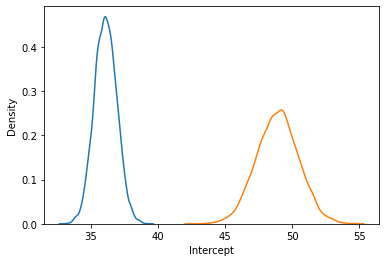

In [24]:
sns.kdeplot(params["Intercept"])
sns.kdeplot(params["sex"])

<AxesSubplot:xlabel='SNAP', ylabel='Density'>

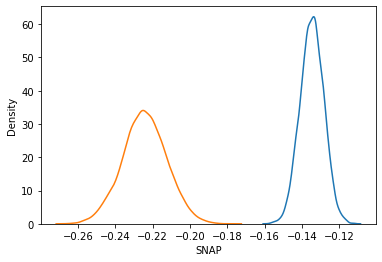

In [168]:
sns.kdeplot(params["SNAP"])
sns.kdeplot(params["sex:SNAP"])

<AxesSubplot:xlabel='UnemploymentRate', ylabel='Density'>

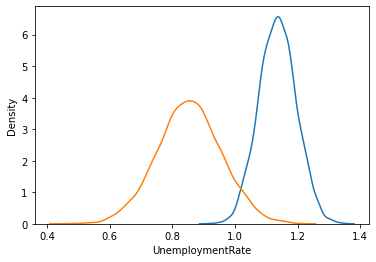

In [169]:
sns.kdeplot(params["UnemploymentRate"])
sns.kdeplot(params["sex:UnemploymentRate"])

In [172]:
params.std() / params.abs().mean()

Unnamed: 0
Intercept               0.022998
sex                     0.031982
UnemploymentRate        0.052550
sex:UnemploymentRate    0.120253
SNAP                    0.046997
sex:SNAP                0.052871
Group Var               0.130117
dtype: float64

In [20]:
CIandVar = pd.concat([params.quantile(.025), params.quantile(.975), params.var()], axis=1)
CIandVar.columns = ["2.5%", "97.5%", "Var"]
CIandVar

,2.5%,97.5%,Var
Unnamed: 0,,,
Intercept,34.493198,37.715036,0.688887
sex,45.866043,51.935079,2.447109
UnemploymentRate,1.020177,1.254238,0.003565
sex:UnemploymentRate,0.651787,1.056267,0.010554
SNAP,-0.147155,-0.122533,0.000040
sex:SNAP,-0.247880,-0.200637,0.000141
Group Var,0.136132,0.224671,0.000540


In [3]:
sample = bootSampleVars.set_index(["year", "sex"]).T
sample.head(3)

year       2003                  2005                  2007             \
sex         0.0        1.0        0.0        1.0        0.0        1.0   
0     19.247935  66.248088  23.118995  26.520196  44.558896  50.096223   
1     28.576602  55.158699  27.823640  35.098666  44.775234  51.313903   
2     35.596998  65.321297  25.769723  24.509707  49.752559  62.733651   

year       2009                  2011                  2013             \
sex         0.0        1.0        0.0        1.0        0.0        1.0   
0     41.538384  61.463199  66.752355  29.281988  30.166713  56.144033   
1     35.272535  54.527335  65.906831  48.983493  25.172281  61.644115   
2     30.935912  59.019582  62.483172  51.292221  26.646720  59.332837   

year       2015                  2017                  2019             
sex         0.0        1.0        0.0        1.0        0.0        1.0  
0     18.286277  31.097899  34.471138  81.672368  27.758141  96.358362  
1     25.085164  40.492948  27.742162  82.164561  22.798413  62.284765  
2     20.149258  42.760458  29.581554  71.752071  30.254295  83.538351

In [4]:
CISample = pd.concat([sample.quantile(.025), sample.quantile(.5), sample.quantile(.975)], axis=1)
CISample.columns = ["2.5%", "50%", "97.5%"]
CISample

2.5%        50%       97.5%
year sex                                  
2003 0.0  20.487547  28.975275   39.369982
     1.0  42.909531  63.166389   87.594902
2005 0.0  18.435736  25.487855   33.781093
     1.0  16.488979  28.008308   42.620642
2007 0.0  33.096642  42.871496   54.326458
     1.0  39.683972  55.847495   74.592232
2009 0.0  27.964434  37.940907   49.369272
     1.0  40.119897  58.217853   80.355218
2011 0.0  42.474617  52.994506   64.953892
     1.0  26.988938  40.793464   57.650093
2013 0.0  22.247139  29.389621   37.910180
     1.0  45.824871  61.592881   79.718907
2015 0.0  15.215027  21.663729   29.602850
     1.0  27.982682  41.086316   57.169100
2017 0.0  21.091323  28.309363   36.997143
     1.0  54.812713  72.001249   92.353040
2019 0.0  22.102202  30.296630   40.647036
     1.0  67.779982  87.221293  110.048417

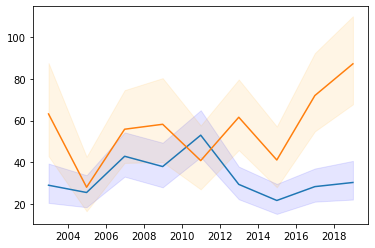

In [10]:
plotDat = CISample.reset_index()
fig, ax = plt.subplots()
ax.plot(plotDat[plotDat["sex"] == 0]["year"], plotDat[plotDat["sex"] == 0]["50%"])
ax.fill_between(plotDat[plotDat["sex"] == 0]["year"],
                plotDat[plotDat["sex"] == 0]["2.5%"],
                plotDat[plotDat["sex"] == 0]["97.5%"], color='b', alpha=.1)
ax.plot(plotDat[plotDat["sex"] == 1]["year"], plotDat[plotDat["sex"] == 1]["50%"])
ax.fill_between(plotDat[plotDat["sex"] == 1]["year"],
                plotDat[plotDat["sex"] == 1]["2.5%"],
                plotDat[plotDat["sex"] == 1]["97.5%"], color='orange', alpha=.1)

In [12]:
pred = bootPredVars.set_index(["year", "sex"]).T
pred.head(3)

year      2003                2005                2007                2009  \
sex        0.0       1.0       0.0       1.0       0.0       1.0       0.0   
0     1.955276  5.420751  1.829585  4.975642  1.165655  5.126110  2.968214   
1     2.055599  5.815935  1.938410  5.407780  1.276999  5.328144  3.264125   
2     2.340266  6.184143  2.153072  5.590356  1.295611  6.025330  3.270683   

year                 2011                 2013                 2015  \
sex         1.0       0.0        1.0       0.0        1.0       0.0   
0     13.136757  2.585223  10.466651  3.375872  14.239690  2.109696   
1     13.684602  2.821912  10.979997  3.699734  14.897234  2.333641   
2     15.401896  2.886858  12.186936  3.741538  16.623569  2.297649   

year                 2017                 2019            
sex         1.0       0.0        1.0       0.0       1.0  
0      9.779087  1.903537   8.857221  1.394005  6.071048  
1     10.166163  2.106448   9.205640  1.533061  6.339622  
2     11.485674  2.071511  10.405249  1.534660  7.099656

In [13]:
CIpred = pd.concat([pred.quantile(.025), pred.quantile(.5), pred.quantile(.975)], axis=1)
CIpred.columns = ["2.5%", "50%", "97.5%"]
CIpred

2.5%        50%      97.5%
year sex                                 
2003 0.0   1.691238   2.209516   2.833501
     1.0   4.914724   5.844536   6.965242
2005 0.0   1.602172   2.056409   2.568976
     1.0   4.280768   5.369550   6.598980
2007 0.0   1.082121   1.284835   1.511452
     1.0   4.932758   5.499703   6.108454
2009 0.0   2.763989   3.260643   3.806134
     1.0  12.593607  14.093749  15.691343
2011 0.0   2.389567   2.852625   3.368351
     1.0   9.908117  11.240659  12.656468
2013 0.0   3.132181   3.715161   4.356452
     1.0  13.542140  15.286177  17.125802
2015 0.0   1.971279   2.307860   2.683333
     1.0   9.391280  10.484276  11.646444
2017 0.0   1.778873   2.081779   2.419758
     1.0   8.507398   9.496079  10.545579
2019 0.0   1.297712   1.530584   1.786848
     1.0   5.794460   6.514232   7.279982

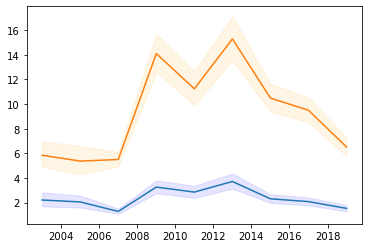

In [14]:
plotDat = CIpred.reset_index()
fig, ax = plt.subplots()
ax.plot(plotDat[plotDat["sex"] == 0]["year"], plotDat[plotDat["sex"] == 0]["50%"])
ax.fill_between(plotDat[plotDat["sex"] == 0]["year"],
                plotDat[plotDat["sex"] == 0]["2.5%"],
                plotDat[plotDat["sex"] == 0]["97.5%"], color='b', alpha=.1)
ax.plot(plotDat[plotDat["sex"] == 1]["year"], plotDat[plotDat["sex"] == 1]["50%"])
ax.fill_between(plotDat[plotDat["sex"] == 1]["year"],
                plotDat[plotDat["sex"] == 1]["2.5%"],
                plotDat[plotDat["sex"] == 1]["97.5%"], color='orange', alpha=.1)

In [20]:
dat = pd.read_csv(root + "violenceKNNResp_wSex_NotSplitImp.csv")

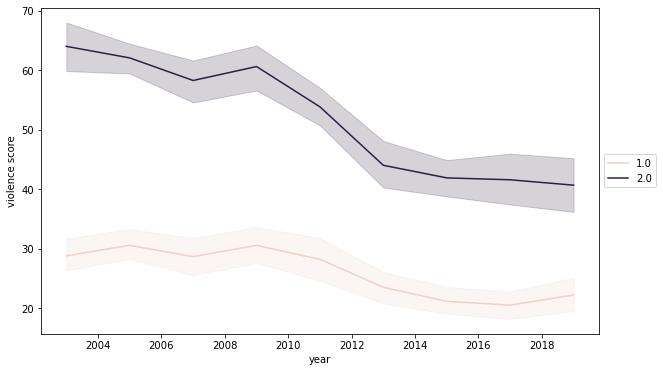

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="year", y="violence score", hue="sex", data=dat)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [126]:
params.T.describe()

,Intercept,sex,UnemploymentRate,sex:UnemploymentRate,SNAP,sex:SNAP,Group Var
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,36.158899,48.974770,1.132609,0.845358,-0.135026,-0.224550,0.178785
std,0.761481,1.526391,0.062171,0.098388,0.005599,0.011695,0.023302
min,33.913371,45.571856,0.898895,0.564700,-0.147803,-0.257871,0.106440
25%,35.708494,47.979764,1.090061,0.782211,-0.138897,-0.231268,0.164460
50%,36.158080,48.848816,1.131262,0.846290,-0.134931,-0.224450,0.178189
75%,36.671287,50.181559,1.173919,0.915467,-0.131295,-0.215741,0.193562
max,37.843480,53.806376,1.318591,1.159116,-0.119671,-0.191258,0.238179


In [127]:
params.T.var()

Intercept               0.579853
sex                     2.329870
UnemploymentRate        0.003865
sex:UnemploymentRate    0.009680
SNAP                    0.000031
sex:SNAP                0.000137
Group Var               0.000543
dtype: float64

In [129]:
params.T.std()

Intercept               0.761481
sex                     1.526391
UnemploymentRate        0.062171
sex:UnemploymentRate    0.098388
SNAP                    0.005599
sex:SNAP                0.011695
Group Var               0.023302
dtype: float64

In [154]:
normalized_df=(params.T-params.T.mean())/params.T.std()
standardized_df=(params.T-params.T.mean())

In [156]:
normalized_df.var()

Intercept               1.0
sex                     1.0
UnemploymentRate        1.0
sex:UnemploymentRate    1.0
SNAP                    1.0
sex:SNAP                1.0
Group Var               1.0
dtype: float64

In [157]:
standardized_df.var()

Intercept               0.579853
sex                     2.329870
UnemploymentRate        0.003865
sex:UnemploymentRate    0.009680
SNAP                    0.000031
sex:SNAP                0.000137
Group Var               0.000543
dtype: float64

In [133]:
import scipy.stats as stats
stats.t.interval(alpha=0.95, df=len(params.T)-1, loc=np.mean(params.T), scale=stats.sem(params.T))

(array([36.05271975, 48.76193217,  1.12394028,  0.83163915, -0.13580677,
        -0.22618092,  0.17553542]),
 array([36.26507899, 49.18760723,  1.14127835,  0.85907729, -0.13424539,
        -0.2229195 ,  0.1820338 ]))

In [131]:
sampleVars.describe()

,Males,Females
count,200.000000,200.000000
mean,140.964227,48.733322
std,4.954926,1.897155
min,128.735104,43.563962
25%,137.623352,47.425013
50%,140.834101,48.579142
75%,144.559452,49.979460
max,153.598500,53.648410


In [132]:
predictVar.describe()

,Males,Females
count,200.000000,200.000000
mean,76.759879,14.666528
std,3.992726,1.062055
min,66.736804,11.709920
25%,74.232785,13.926351
50%,76.641945,14.624382
75%,79.154480,15.314846
max,88.026288,17.043944


In [151]:
sampleVars.quantile([.025, .975])

,Males,Females
0.025,131.765103,45.534801
0.975,150.023239,52.327348


In [152]:
predictVar.quantile([.025, .975])

,Males,Females
0.025,68.688960,12.865851
0.975,84.418489,16.777050


<AxesSubplot:xlabel='Males', ylabel='Density'>

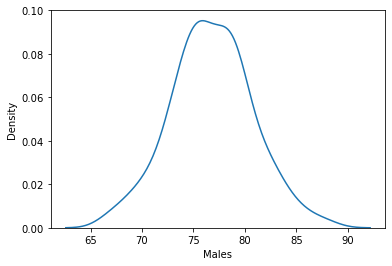

In [144]:
import seaborn as sns
#sns.kdeplot(sampleVars['Males'])
sns.kdeplot(predictVar['Males'])

<AxesSubplot:xlabel='Females', ylabel='Density'>

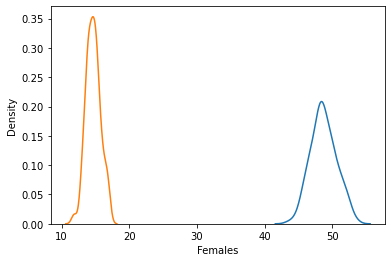

In [141]:
sns.kdeplot(sampleVars['Females'])
sns.kdeplot(predictVar['Females'])

In [ ]:
# Rerun for spliting it for each year